In [1]:
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import optuna
from skopt import BayesSearchCV
pd.set_option('display.max_columns', None)

C:\Users\giris\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
training_df=pd.read_csv("../Datasets/training.csv")
training_df.fillna(0,inplace=True)
training_df.drop(['date', 'month'],axis=1,inplace=True)
training_df.head()

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,fire
0,22.922499,58.003628,14.2225,22.934956,0.0,0.0,0.0,0.0,0.0,1016.0,972.92520,0.0,0.0,0.0,0.0,0.282696,1.174461,9.366919,12.979984,357.797450,356.820220,23.759998,22.122500,23.972500,22.172499,18.5225,0.152,0.203,0.243,0.205,0
1,18.571500,81.909440,15.4215,18.963050,0.0,0.0,0.0,0.0,0.0,1016.4,1012.24410,0.9,1.0,0.0,0.0,0.011328,0.387156,9.885262,21.900904,123.111350,115.301346,18.000000,21.271502,22.671501,22.271502,20.3715,0.425,0.433,0.423,0.405,1
2,22.240500,27.772692,2.7405,18.372614,0.0,0.0,0.0,0.0,0.0,1022.5,985.25180,0.0,0.0,0.0,0.0,0.257499,1.939014,15.111424,23.051247,167.619250,165.529660,37.800000,24.990500,19.740500,19.790499,18.7405,0.069,0.088,0.120,0.209,0
3,17.717500,96.893280,17.2175,19.324417,0.0,0.0,0.0,0.0,0.0,1016.8,969.77330,0.9,1.0,0.0,0.0,0.000000,0.063011,6.608722,10.966713,29.357658,66.801384,9.000000,22.517500,25.717500,23.117500,22.2175,0.117,0.136,0.186,0.275,0
4,34.603500,29.610748,14.3035,36.488297,0.0,0.0,0.0,0.0,0.0,1005.2,993.78467,0.0,0.0,0.0,0.0,0.678196,3.870263,8.145870,10.948973,315.000100,313.667850,18.720000,32.953503,27.253500,25.253500,24.0535,0.309,0.347,0.184,0.170,0


In [7]:
training_df.shape

(214545, 31)

In [8]:
X=training_df.drop('fire',axis=1)
y=training_df['fire']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.fit_transform(X_test)

In [11]:
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')

In [12]:
xgb_cv_scores  = cross_val_score(xgb_model, X_train_transformed, y_train, cv=5, scoring='accuracy')

print("XGBoost Cross-Validation Scores: ", xgb_cv_scores)
print("XGBoost Mean Accuracy: ", np.mean(xgb_cv_scores))

XGBoost Cross-Validation Scores:  [0.74979608 0.74760393 0.74699216 0.75115798 0.74620561]
XGBoost Mean Accuracy:  0.7483511533423555


In [13]:
xgb_model.fit(X_train_transformed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [14]:
y_train_pred_xgb = xgb_model.predict(X_train_transformed)

train_accuracy = accuracy_score(y_train, y_train_pred_xgb)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

Training Accuracy: 78.68%


Accuracy: 75.21%
Precision: 76.26%
Recall: 75.21%
F1 Score: 74.96%


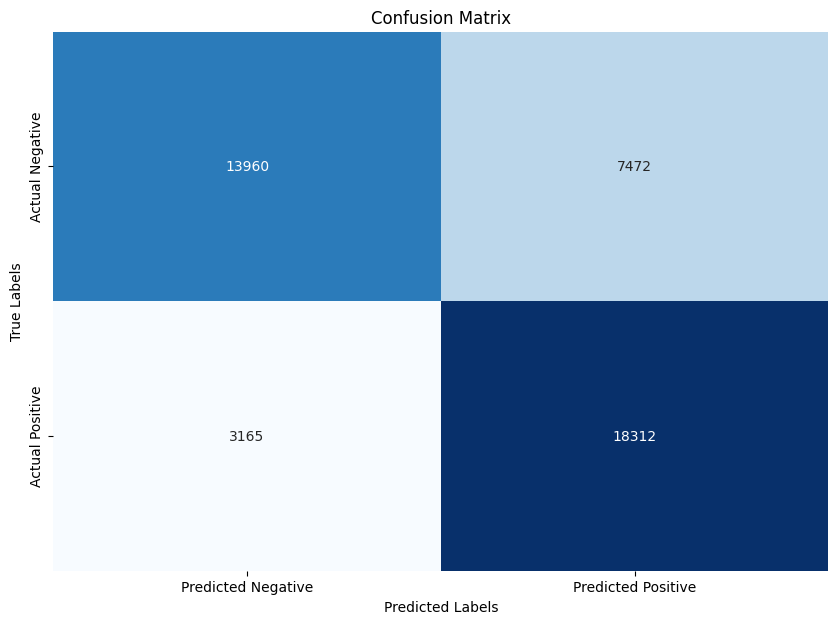

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.65      0.72     21432
           1       0.71      0.85      0.77     21477

    accuracy                           0.75     42909
   macro avg       0.76      0.75      0.75     42909
weighted avg       0.76      0.75      0.75     42909



In [15]:
y_pred_xgb = xgb_model.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(y_test, y_pred_xgb, average='weighted')
recall = recall_score(y_test, y_pred_xgb, average='weighted')
f1 = f1_score(y_test, y_pred_xgb, average='weighted')

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report for detailed metrics
class_report = classification_report(y_test, y_pred_xgb)
print('Classification Report:')
print(class_report)

In [16]:
xgb_model = xgb.XGBClassifier()

search_space_xgb = {
    'learning_rate': (0.01, 0.2),
    'n_estimators': (50, 500),
    'max_depth': (3, 10),
    'subsample': (0.6, 1.0)
}

bayes_search_xgb = BayesSearchCV(estimator=xgb_model, search_spaces=search_space_xgb, cv=5, n_jobs=-1, verbose=2)

bayes_search_xgb.fit(X_train_transformed, y_train)

print(f"Best parameters: {bayes_search_xgb.best_params_}")
print(f"Best cross-validation score: {bayes_search_xgb.best_score_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [17]:
best_xgboost_model = xgb.XGBClassifier(
    learning_rate=bayes_search_xgb.best_params_['learning_rate'],
    max_depth=bayes_search_xgb.best_params_['max_depth'],
    n_estimators=bayes_search_xgb.best_params_['n_estimators'],
    subsample=bayes_search_xgb.best_params_['subsample'],
)

best_xgboost_model.fit(X_train_transformed, y_train)

y_train_pred_xgb = best_xgboost_model.predict(X_train_transformed)

train_accuracy = accuracy_score(y_train, y_train_pred_xgb)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

Training Accuracy: 95.49%


Accuracy: 80.33%
Precision: 76.98%
Recall: 86.60%
F1 Score: 81.51%


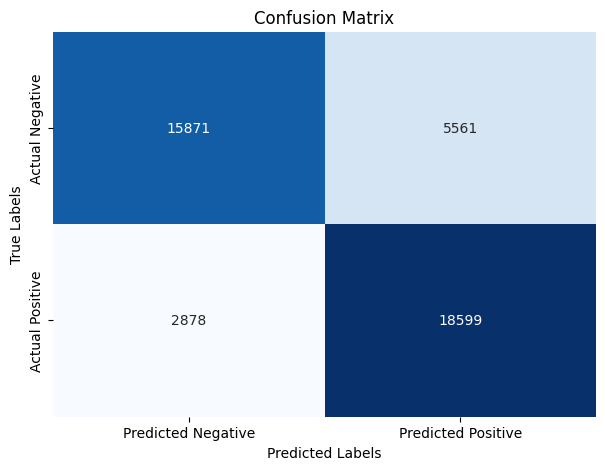

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79     21432
           1       0.77      0.87      0.82     21477

    accuracy                           0.80     42909
   macro avg       0.81      0.80      0.80     42909
weighted avg       0.81      0.80      0.80     42909



In [18]:
y_pred_xgb = best_xgboost_model.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report for detailed metrics
class_report = classification_report(y_test, y_pred_xgb)
print('Classification Report:')
print(class_report)

In [19]:
importances = best_xgboost_model.feature_importances_
feature_names=X.columns
feature_imp_df = pd.DataFrame({'Feature': X.columns.tolist(), 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
feature_imp_df

,Feature,Gini Importance
15,et0_fao_evapotranspiration,0.140491
22,soil_temperature_0_to_7cm,0.055898
1,relative_humidity_2m,0.050106
23,soil_temperature_7_to_28cm,0.049464
18,wind_speed_100m,0.042010
24,soil_temperature_28_to_100cm,0.040945
16,vapour_pressure_deficit,0.039046
13,cloud_cover_mid,0.037517
9,pressure_msl,0.036233
8,weather_code,0.035732


In [20]:
y_scores = best_xgboost_model.predict_proba(X_test_transformed)[:, 1]

AUC-ROC Score: 0.8763091298324241


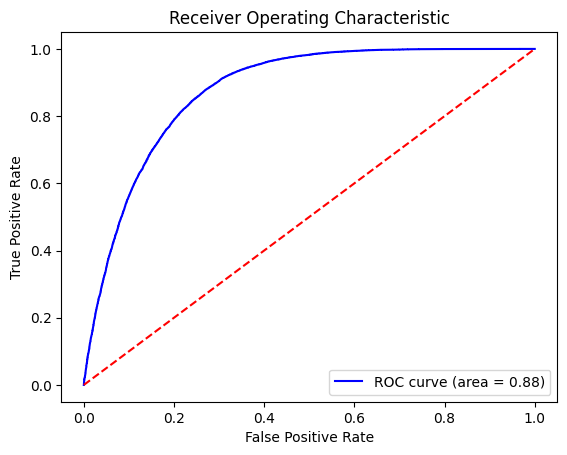

In [21]:
auc_score = roc_auc_score(y_test, y_scores)
print("AUC-ROC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()